In [38]:
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm # 글꼴을 시스템에 등록
import seaborn as sb
import numpy as np
from hossam import load_data
from pandas import CategoricalDtype

In [3]:
origin = load_data('wage')
origin.head()

[data] https://data.hossam.kr/data/lab06/wage.xlsx
[desc] Wage 데이터 셋은 경제 및 노동 시장에 관련된 정보를 담고 있는 데이터셋(출처: ADsP 기출문제)

field       description
----------  ------------------
year        년도
age         나이
maritl      결혼여부
race        근로자의 인종
education   교육수준
region      지역
jobclass    직군
health      건상상태
health_ins  건강보험 가입 여부
logwage     임금(로그값)
wage        임금



,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [4]:
print(origin.info())
print(origin.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 257.9+ KB
None
year          0
age           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64


In [53]:
df1 = origin.astype({'year': 'category','maritl': 'category','race': 'category','education': 'category',
                     'region': 'category', 'jobclass': 'category','health': 'category',
                     'health_ins': 'category'})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   category
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 95.3 KB


### 수치형 변수에 대한 데이터 분포 확인
#### 기술통계 - 명목형 변수는 자동 제외

In [44]:
# 연속형 변수 -> 기술통계량 확인하고, 여러개의 칼럼이면 for문 활용하여 한번에 처리
df1 = origin.copy()
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3000.0,2005.791000,2.026167,2003.000000,2004.000000,2006.000000,2008.000000,2009.000000
age,3000.0,42.414667,11.542406,18.000000,33.750000,42.000000,51.000000,80.000000
logwage,3000.0,4.653905,0.351753,3.000000,4.447158,4.653213,4.857332,5.763128
wage,3000.0,111.703608,41.728595,20.085537,85.383940,104.921507,128.680488,318.342430


In [7]:
my_dpi = 200
font_path = 'C:\\Users\\wodyd\\Documents\\카카오톡 받은 파일./MaruBuri-Regular.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = 'MaruBuri'
my_theme = 'dark'
sb.set_theme(style = my_theme)

plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

### bot plot 그리기

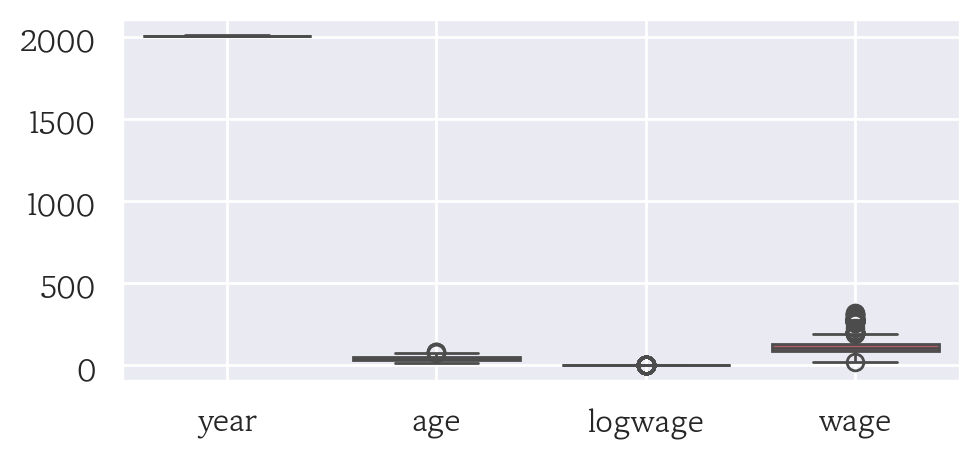

In [8]:
width_px = 1000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
sb.boxplot(data=df1)

# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

### 반복문 활용하여 한번에 표시

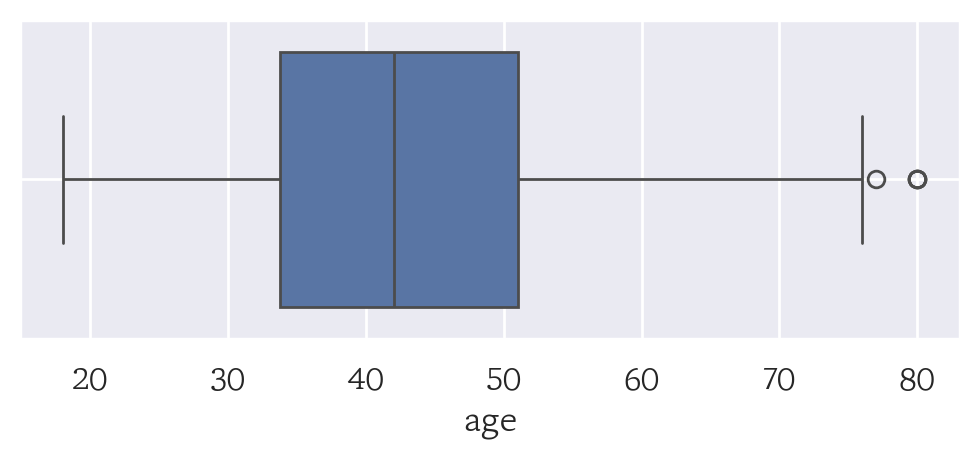

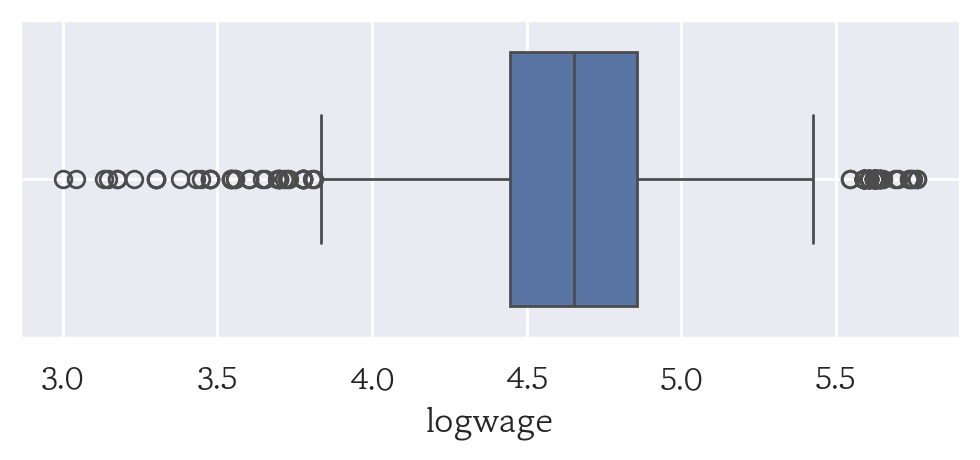

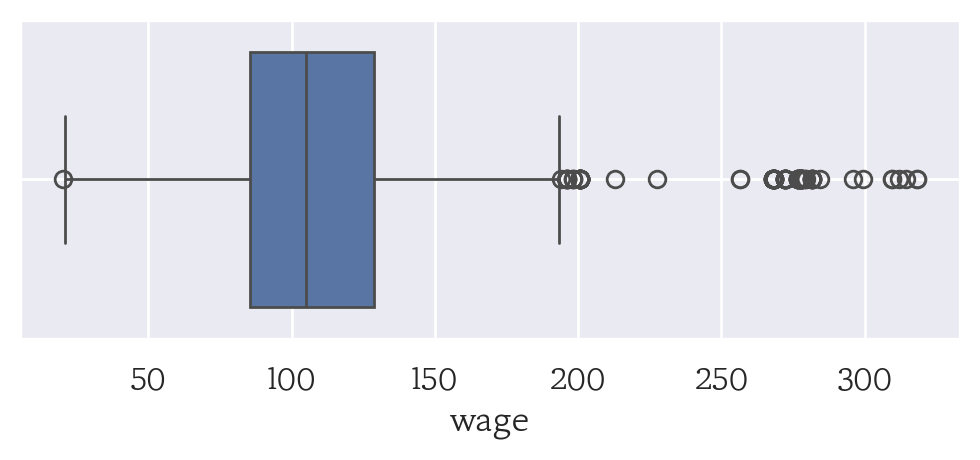

In [9]:
fields =['age','logwage','wage']
for f in fields:
    width_px = 1000
    height_px = 480
    rows = 1
    cols = 1
    figsize = (width_px/ my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
    sb.boxplot(data=df1, x = f)

# 그래프 꾸미기
    ax.grid(True) # 배경 격자 표시/숨김

# 출력
    plt.tight_layout()
    plt.savefig('myplot.png', dpi = my_dpi)
    plt.show()
    plt.close()

### 명목형 변수 데이터 분포 확인

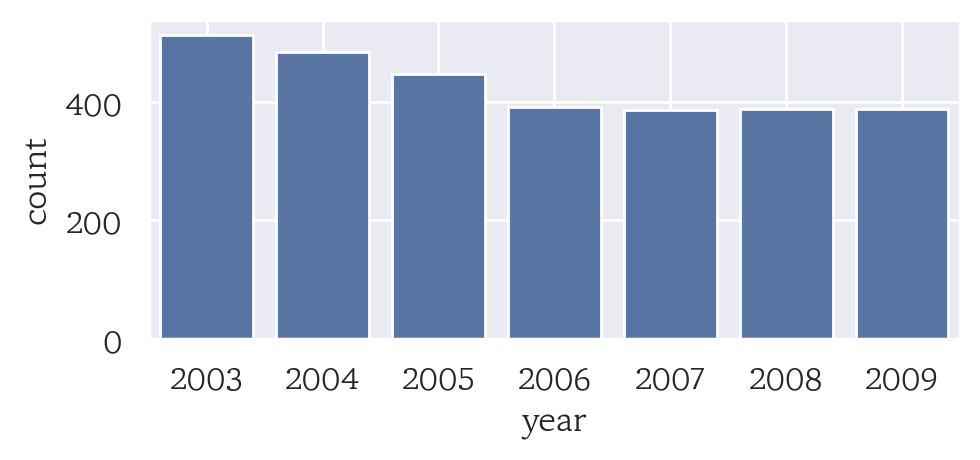

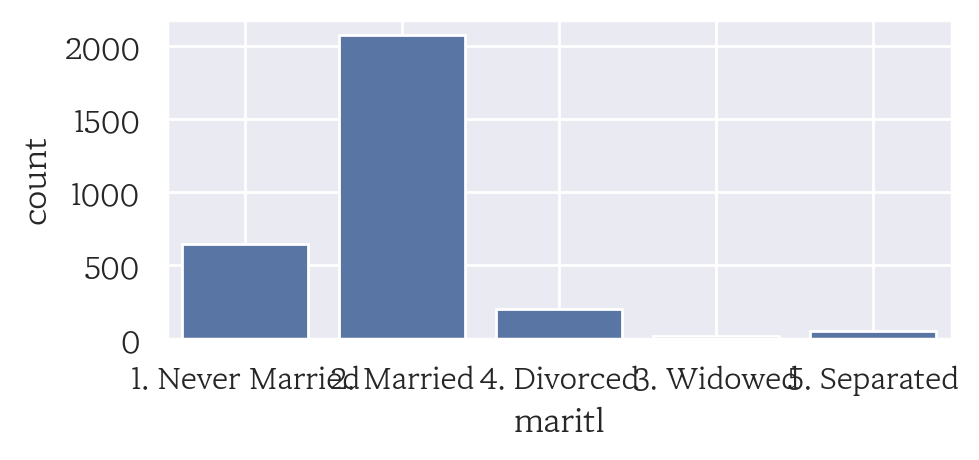

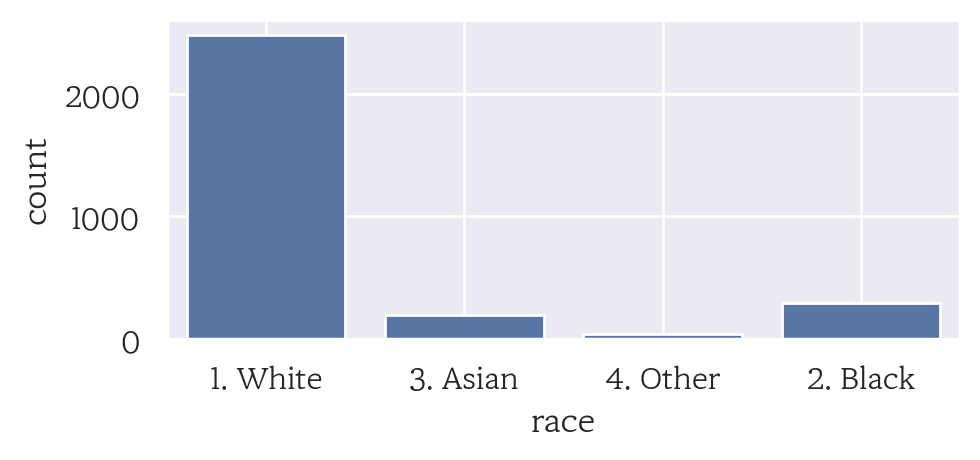

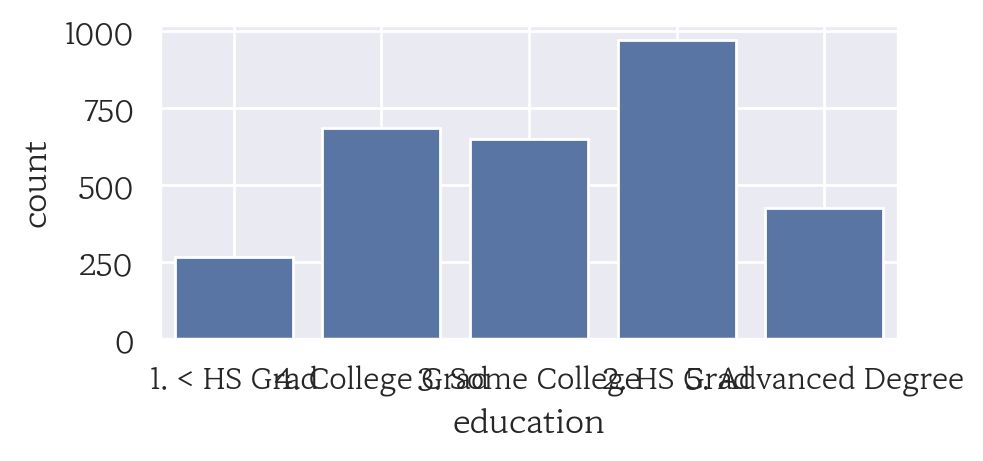

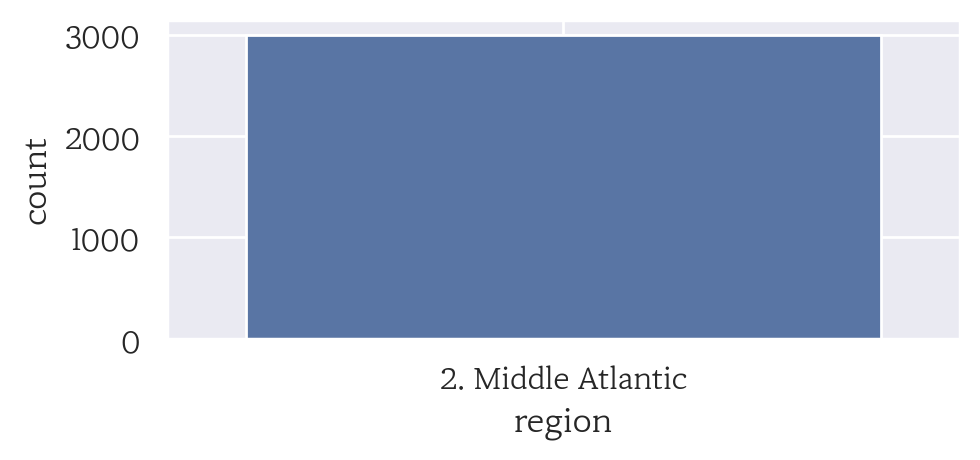

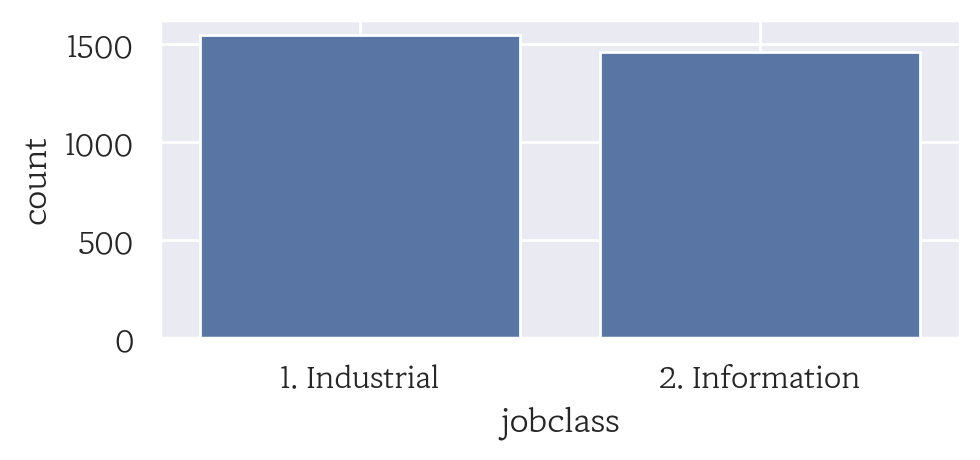

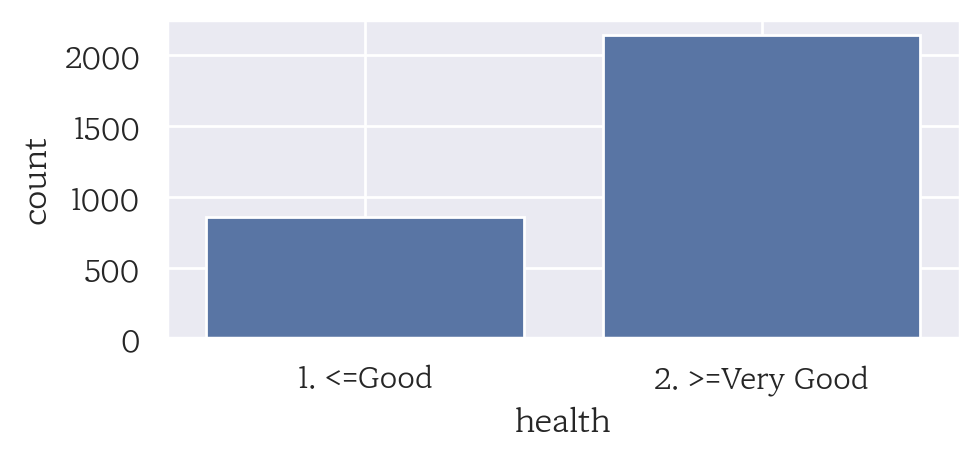

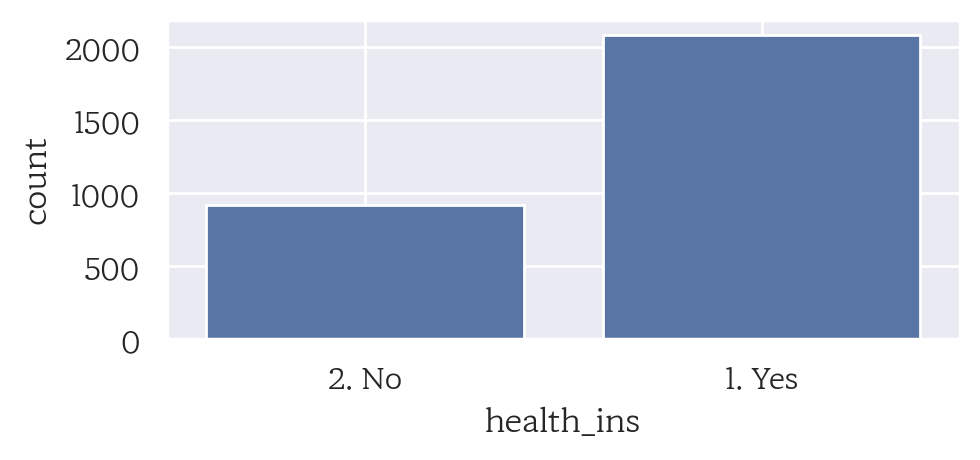

In [10]:
fields =['year','maritl','race','education','region','jobclass','health','health_ins']
for f in fields:
    width_px = 1000
    height_px = 480
    rows = 1
    cols = 1
    figsize = (width_px/ my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# box 그리기
    sb.countplot(data=df1, x = f)

# 그래프 꾸미기
    ax.grid(True) # 배경 격자 표시/숨김

# 출력
    plt.tight_layout()
    plt.savefig('myplot.png', dpi = my_dpi)
    plt.show()
    plt.close()

### 결혼 여부(하나의 값만 사용)에 따른 임금 수준 비교

In [11]:
married =sorted(list(df1['maritl'].unique()))
married

['1. Never Married', '2. Married', '3. Widowed', '4. Divorced', '5. Separated']

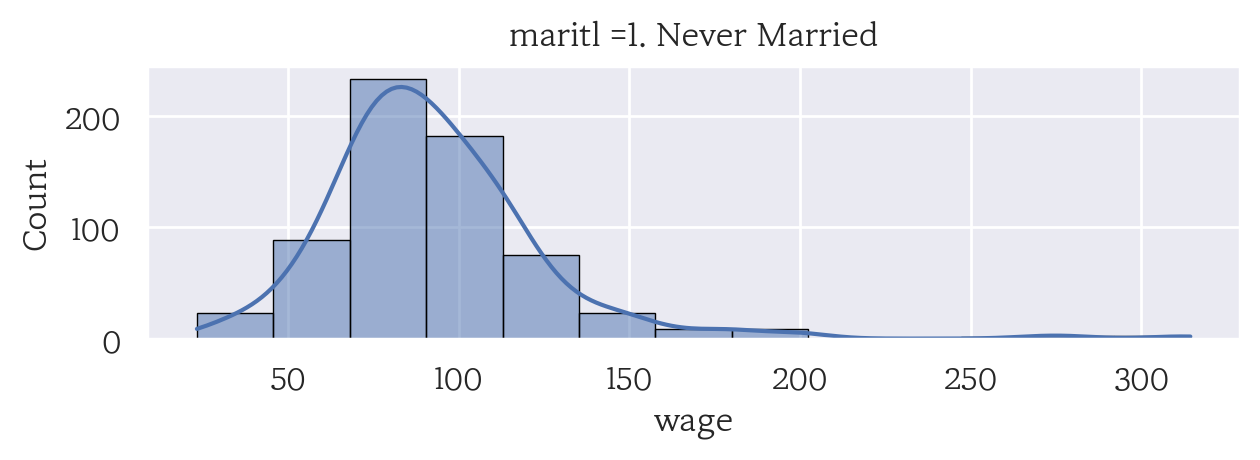

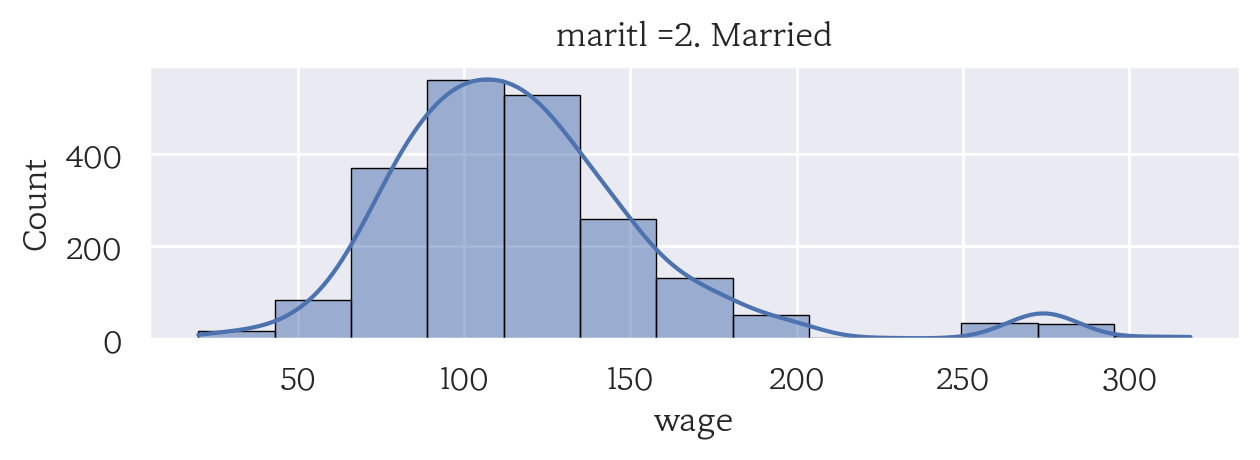

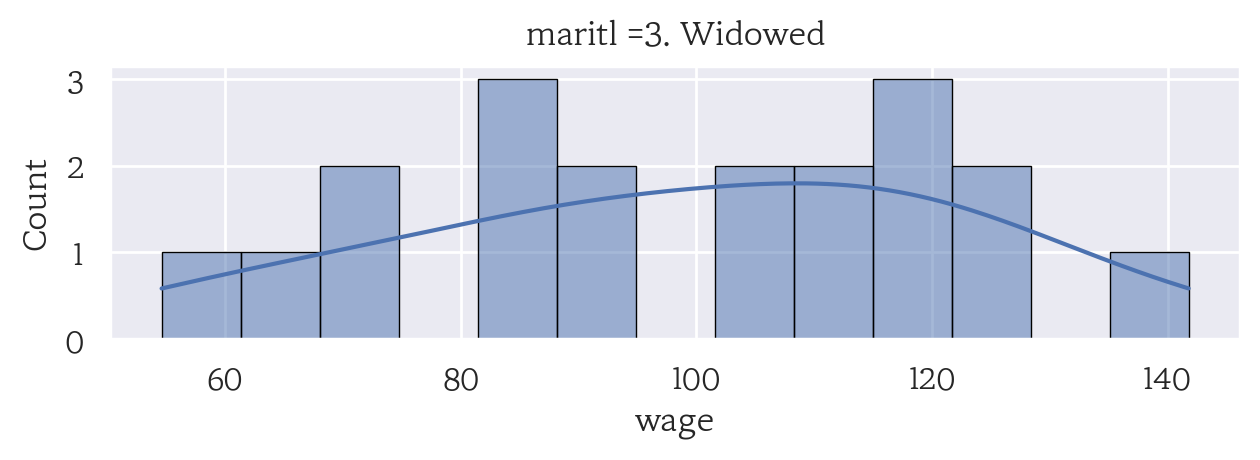

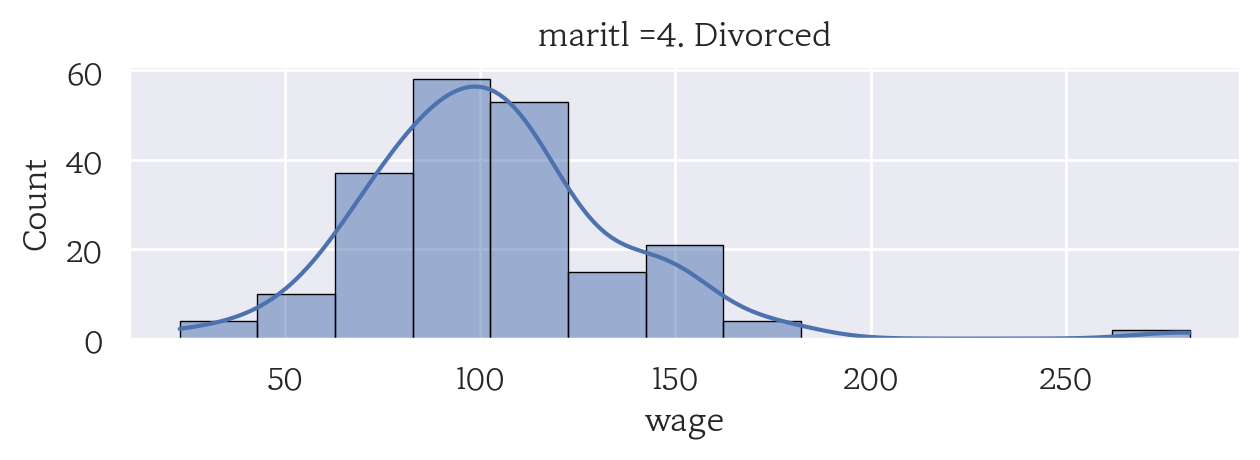

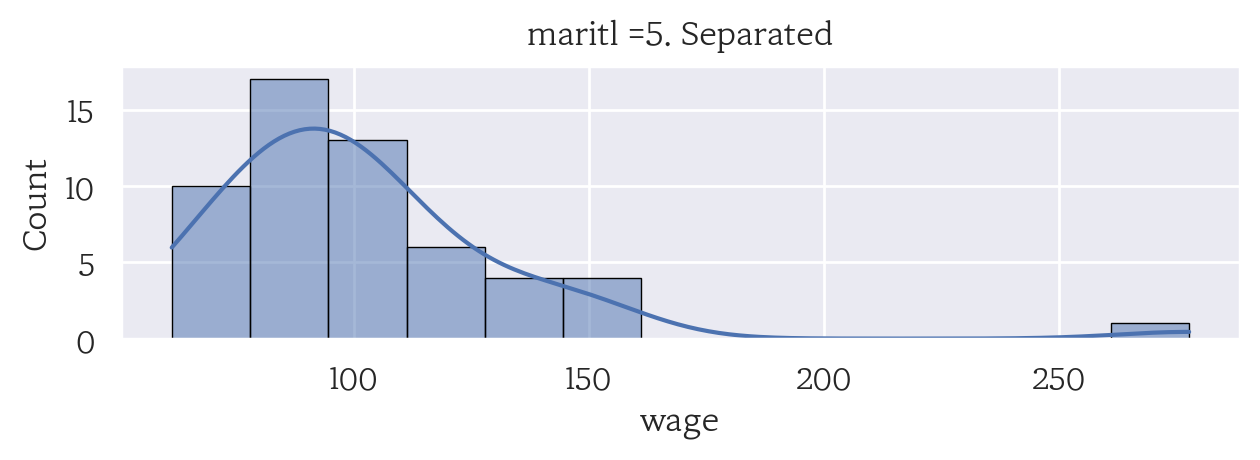

In [13]:
bins_count = 13
for m in married:
    mdf = df1.query('maritl == @m')
    width_px = 1280
    height_px = 480
    rows = 1
    cols = 1
    figsize = (width_px/ my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# hist 그리기
    sb.histplot(data=mdf, x = 'wage',bins = bins_count,edgecolor = '#000000', linewidth =0.5, kde = True)

# 그래프 꾸미기
    ax.grid(True) # 배경 격자 표시/숨김
    ax.set_title('maritl =%s' % m, fontsize =12, pad = 8)
# 출력
    plt.tight_layout()
    

### 교육 수준에 따른 임금 수준 비교

In [14]:
education =sorted(list(df1['education'].unique()))
education

['1. < HS Grad',
 '2. HS Grad',
 '3. Some College',
 '4. College Grad',
 '5. Advanced Degree']

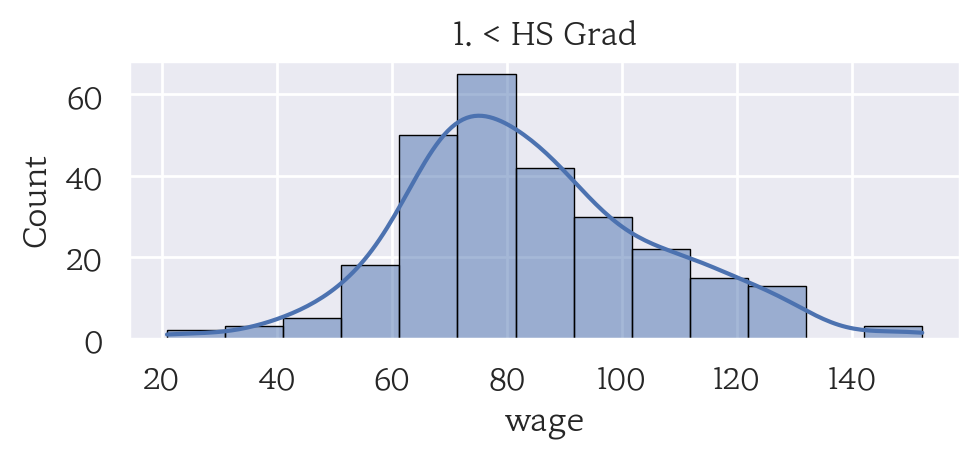

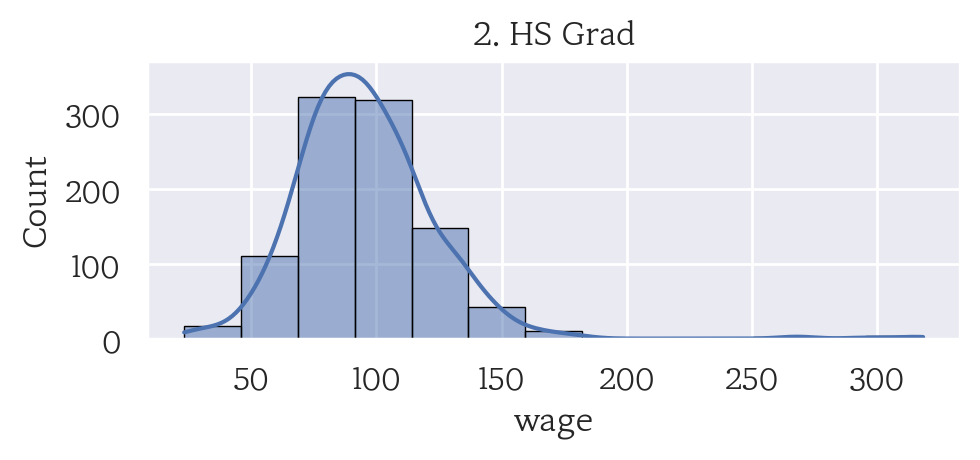

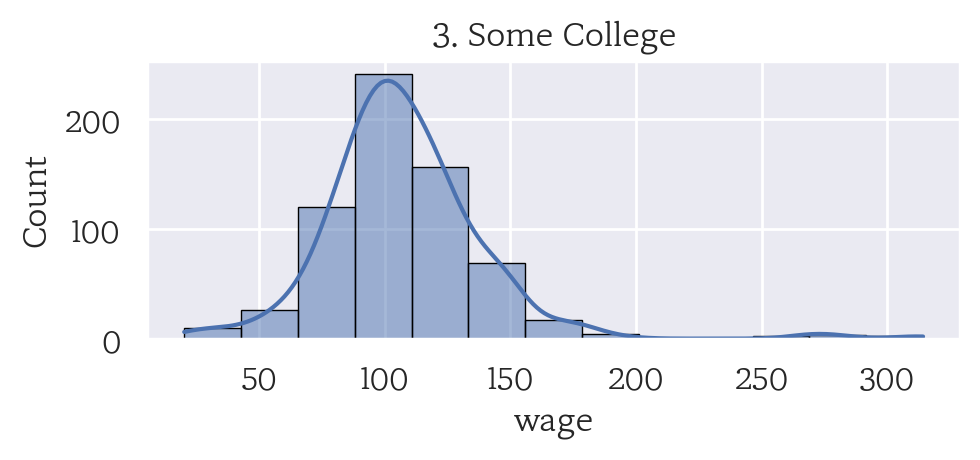

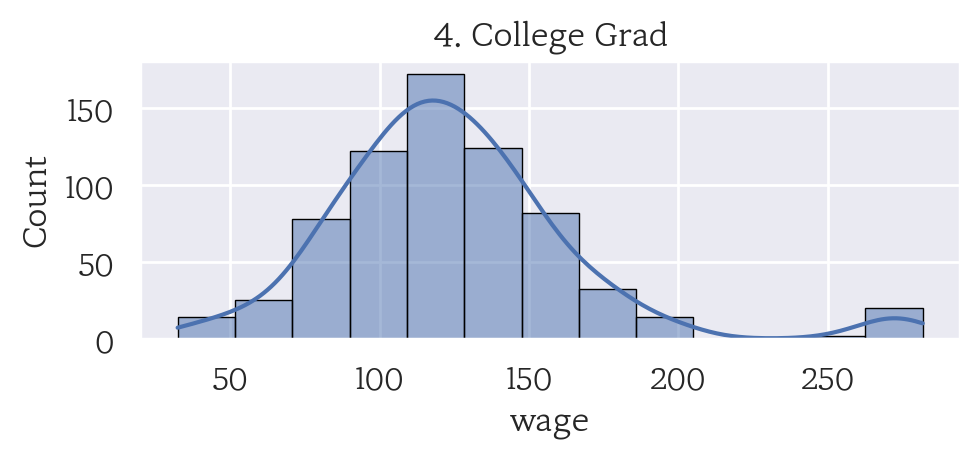

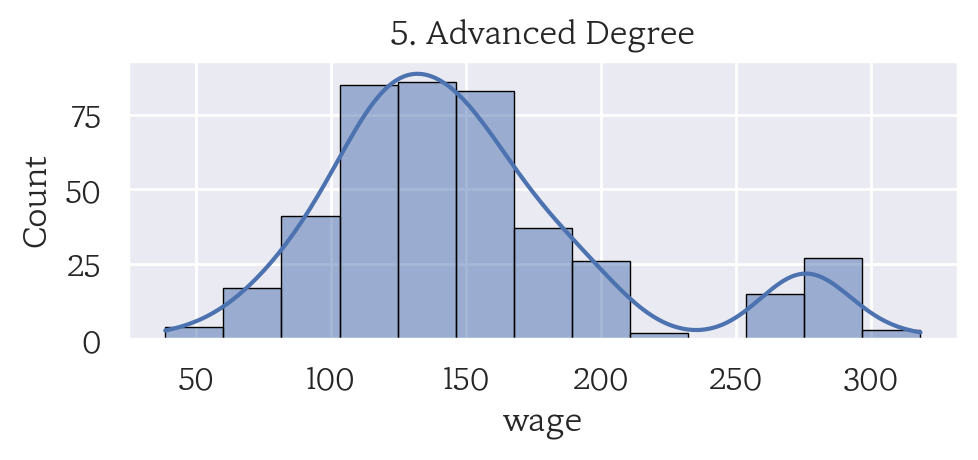

In [19]:
bins_count = 13
for e in education:
    mdf = df1.query('education == @e')
    width_px = 1000
    height_px = 480
    rows = 1
    cols = 1
    figsize = (width_px/ my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# histogram 그리기
    sb.histplot(data = mdf, x = 'wage', bins = bins_count, 
            edgecolor ='#000000', linewidth = 0.5, kde = True)
    
# 출력
    plt.title(e)
    plt.tight_layout()
    ax.grid()
    plt.savefig('myplot.png', dpi = my_dpi)
    plt.show()
    plt.close()

### 직군별 건강상태 확인


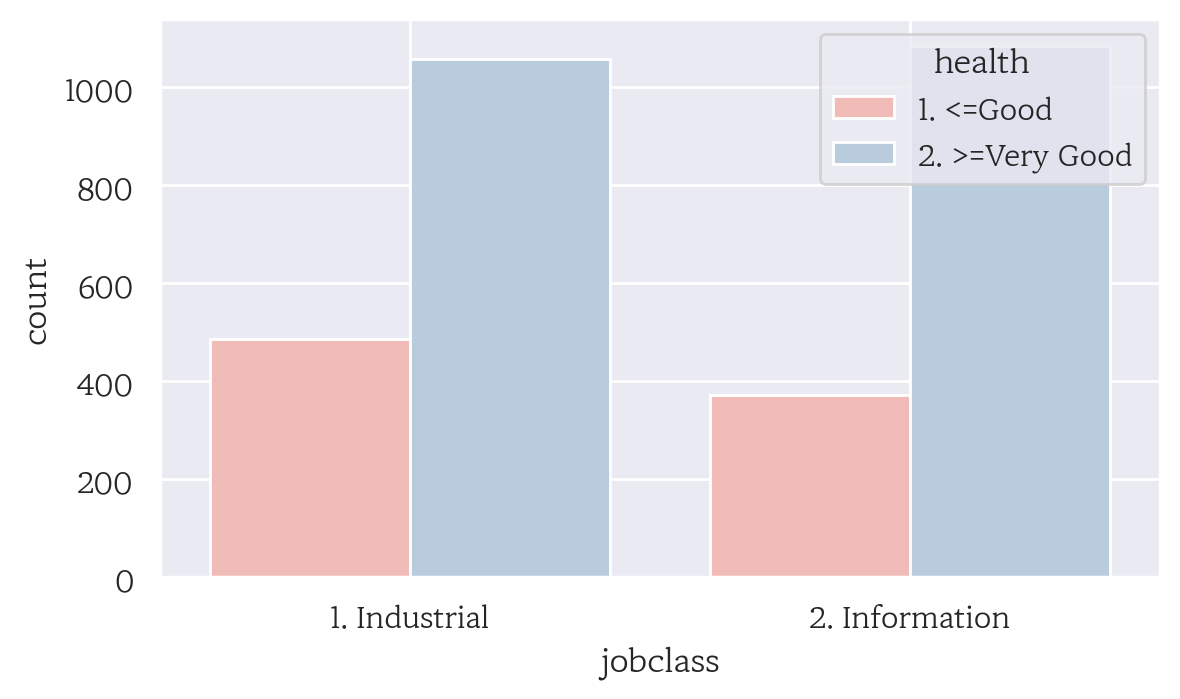

In [20]:
width_px = 1200
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# count 그리기
sb.countplot(data=df1,
             x ='jobclass',
             hue ='health',
             palette = 'Pastel1'                        
          )       

ax.grid(True)

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()

### 예제 - 1 
#### 교육 수준별 나이와 임금의 관계 시각화

In [81]:
education =sorted(list(df1['education'].unique()))
print(education)
print(df1.info())


['1. < HS Grad', '2. HS Grad', '3. Some College', '4. College Grad', '5. Advanced Degree']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   category
 1   age         3000 non-null   int64   
 2   maritl      3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(8), float64(2), int64(1)
memory usage: 95.3 KB
None


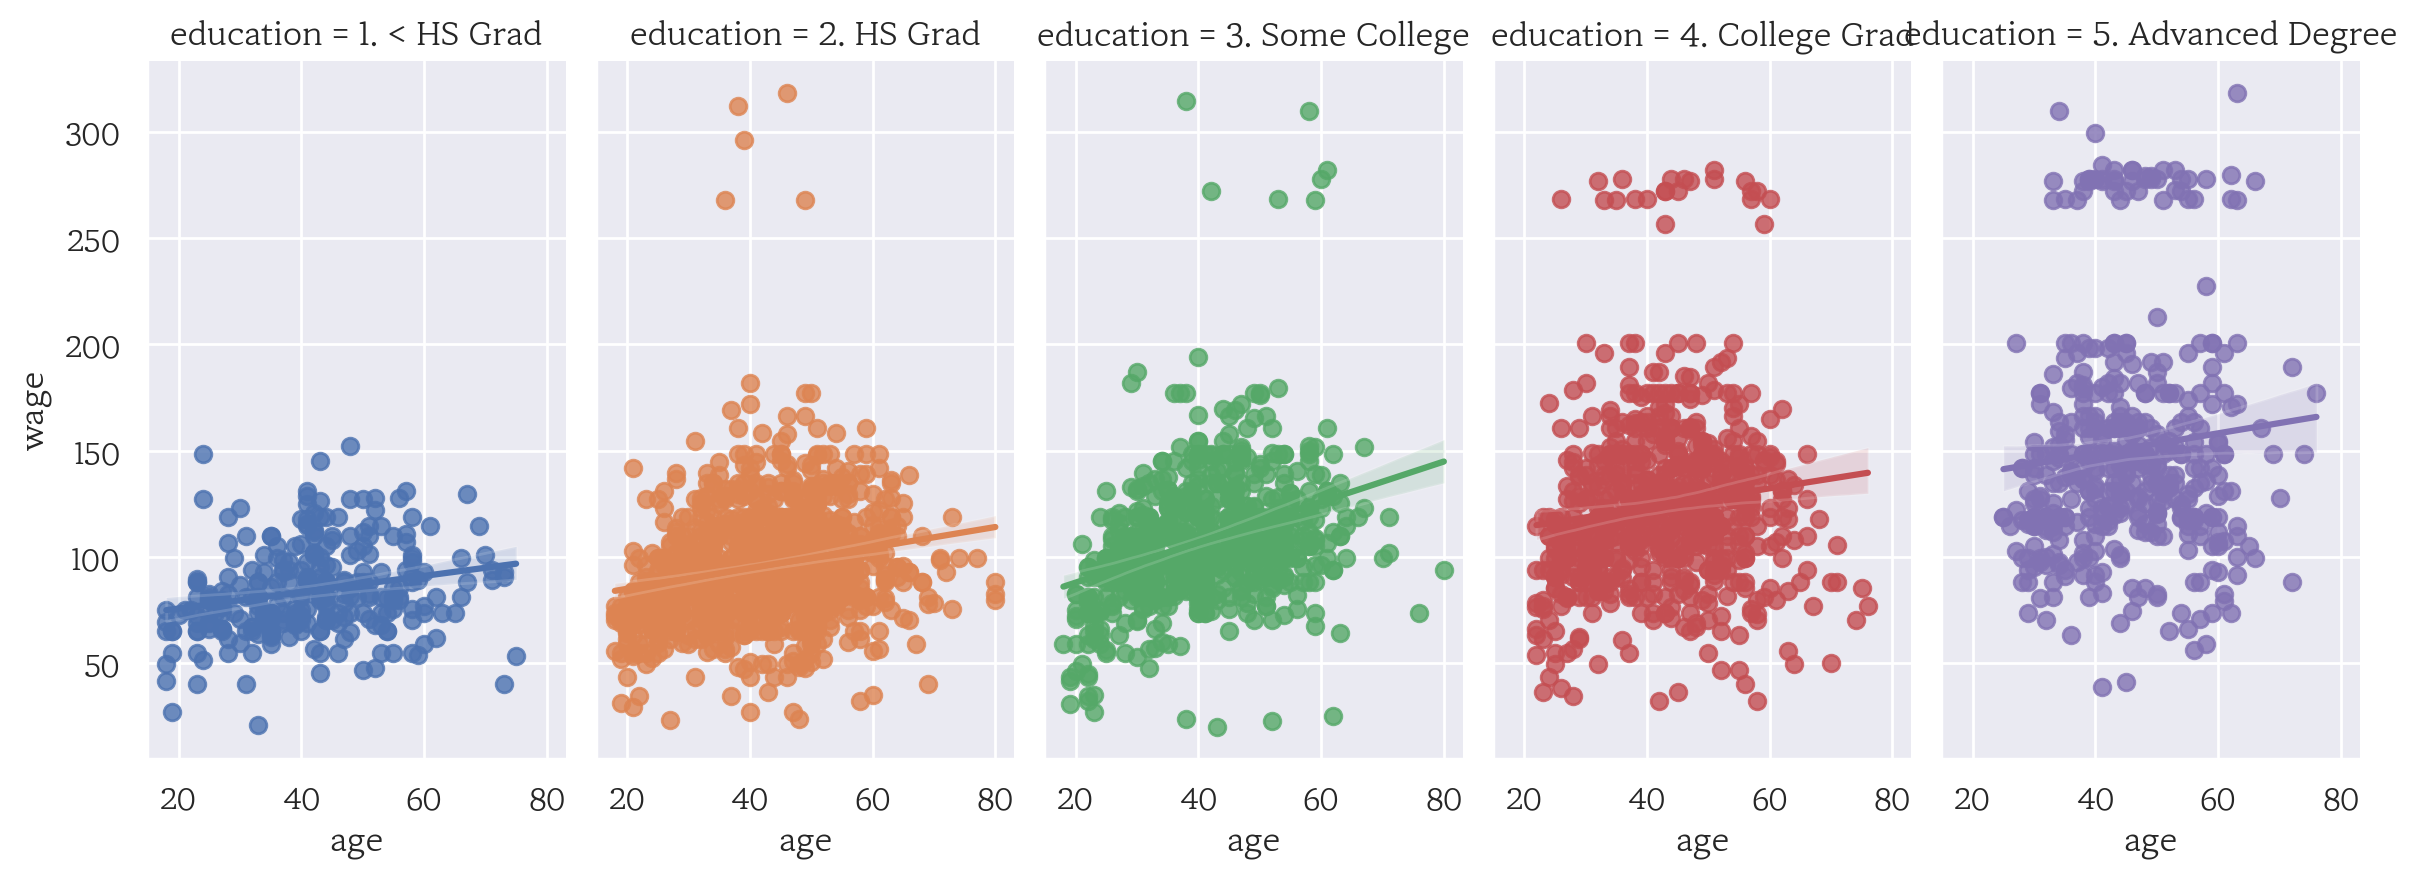

In [79]:
width_px = 2400
height_px = 900
figsize = (width_px/ my_dpi, height_px / my_dpi)

# lmplot 그리기
g= sb.lmplot(data=df1, x ='age', y='wage', hue ='education', col = 'education') # col, row 선택사항
g.fig.set_figwidth(figsize[0])                                                                          
g.fig.set_dpi(my_dpi)
g.fig.set_figheight(figsize[1])
# 그래프 꾸미기
plt.grid(True) # 배경 격자 표시/숨김, 조건별 병렬 시각화에서는 사용 안함
for ax in g.axes.flatten():
    ax.grid(True)     # for문 선택사항: 분할된 그래프에 패턴 적용시 사용


# 출력
plt.tight_layout()
plt.show()
plt.close()

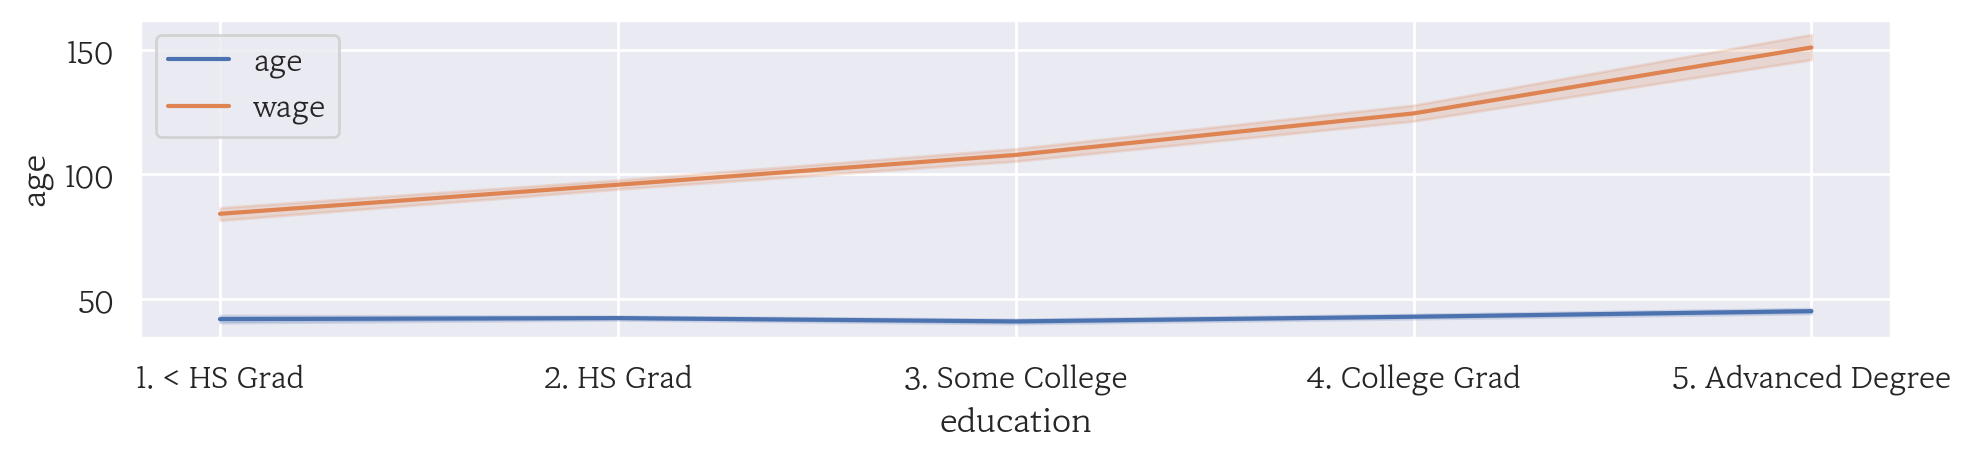

In [80]:
width_px = 2000
height_px = 480
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 그래프 그리기, seaborn 사용
sb.lineplot(data = df1, x= 'education', y = 'age', label = 'age')
sb.lineplot(data = df1, x= 'education', y = 'wage', label = 'wage')
# 그래프 꾸미기
ax.grid(True) # 배경 격자 표시/숨김

# 출력
plt.tight_layout()
plt.show()
plt.close()


In [82]:
# 고학력 일수록 시간이 지남에 따라 임금은 높아진다
# 나이는 임금과 상관없다

In [86]:
race = sorted(list(df1['race'].unique()))
race

['1. White', '2. Black', '3. Asian', '4. Other']

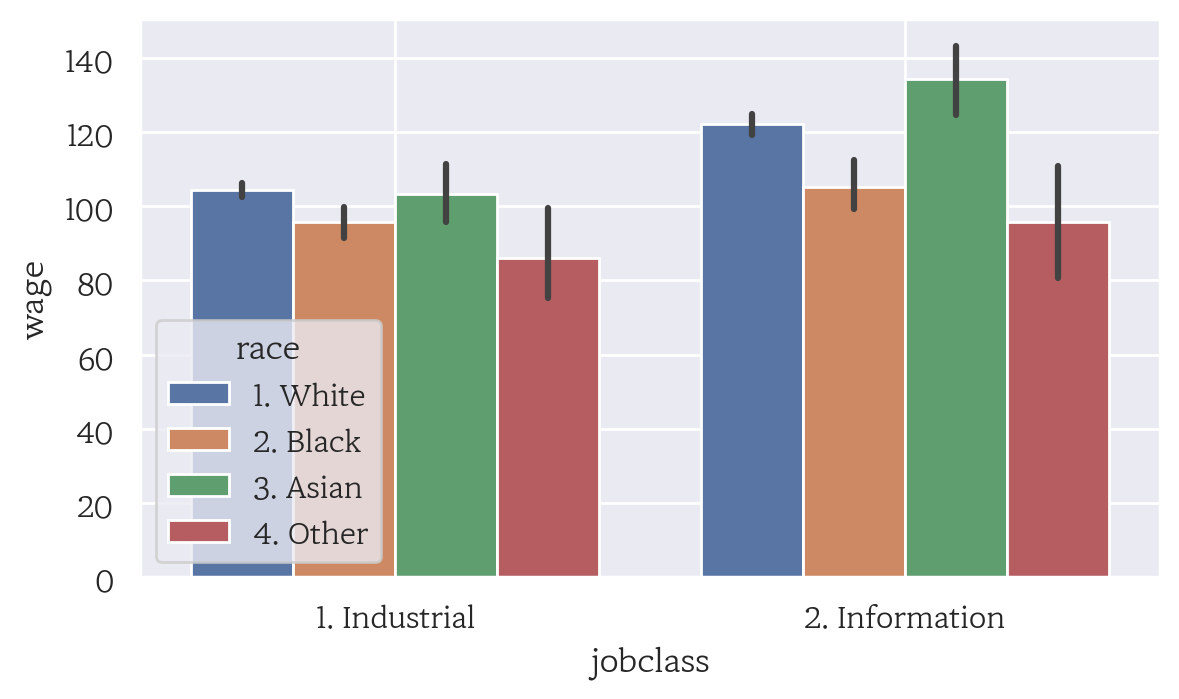

In [97]:
width_px = 1200
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# bar 그리기
sb.barplot(data=df1,              # 사용할 데이터프레임
           x = 'jobclass',            # 막대의 카테고리축
           y ='wage',                 # 요약할 수치변수
           hue ='race',               # 그룹 구분: None, 'sex', 'island'....
           estimator =np.mean)        # 요약 방식: np.mean, np.median

ax.grid(True)

# 출력
plt.tight_layout()
plt.savefig('myplot.png', dpi = my_dpi)
plt.show()
plt.close()
# 그래프에 보이는 검은색 막대기: 다른 값으로 평균, 합계등을 내도 이 수준에 머무를 것이다를 보여주는 말.

In [ ]:
# industrial은 other 인종을 제외한 나머지 인종의 격차는 비슷한 수준에 머물렀다
# information은 아시아 인종의 임금이 제일 높았다.